# Exploración de datos con Python
## AA1 – Segmentación con K-Means

Este notebook corresponde a la primera etapa del proceso de segmentación de clientes usando el algoritmo no supervisado **K-Means**, en el marco del programa de formación en segmentación con K-Means.

En esta fase se realiza un análisis exploratorio del conjunto de datos, con el objetivo de comprender su estructura, tipología de variables y posibles relaciones, antes de aplicar cualquier técnica de agrupamiento.


### Importación de librerías

In [1]:
# Importamos las librerías necesarias para el análisis de datos y visualización

import pandas as pd            # Para manejo de datos en estructuras tipo DataFrame
import numpy as np             # Para operaciones numéricas y algebra lineal
import matplotlib.pyplot as plt  # Para generar gráficos básicos
import seaborn as sns          # Para visualizaciones estadísticas más avanzadas

# Establecemos un estilo visual uniforme para los gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)  # Tamaño de gráficos por defecto

### Carga del conjunto de datos

In [2]:
# La cargar del archivo es directamente desde Google Drive

# Paso 1: Instalamos PyDrive (solo la primera vez si es necesario)
# !pip install -U -q PyDrive

# Paso 2: Importamos e inicializamos la autenticación de Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Autenticamos al usuario
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Paso 3: Descargamos el archivo usando su ID de Drive
file_id = '1f5B2kMAA7MY33-r1dyko5NYCkEXLNRda'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Mall_Customers.csv')

# Paso 4: Cargamos el archivo en un DataFrame de pandas
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

# Mostramos las primeras filas
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Información general del dataset

In [3]:
# Obtenemos dimensiones del dataset: número de filas y columnas
print("Dimensiones del dataset:", df.shape)

# Obtenemos información detallada del tipo de cada columna
df.info()

Dimensiones del dataset: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Estadísticas descriptivas

In [4]:
# Resumen estadístico para columnas numéricas
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Conteo de valores para la variable categórica 'Gender'
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


###  Verificación de valores nulos

In [6]:
# Revisamos si hay valores nulos en alguna columna
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### Distribución de variables numéricas

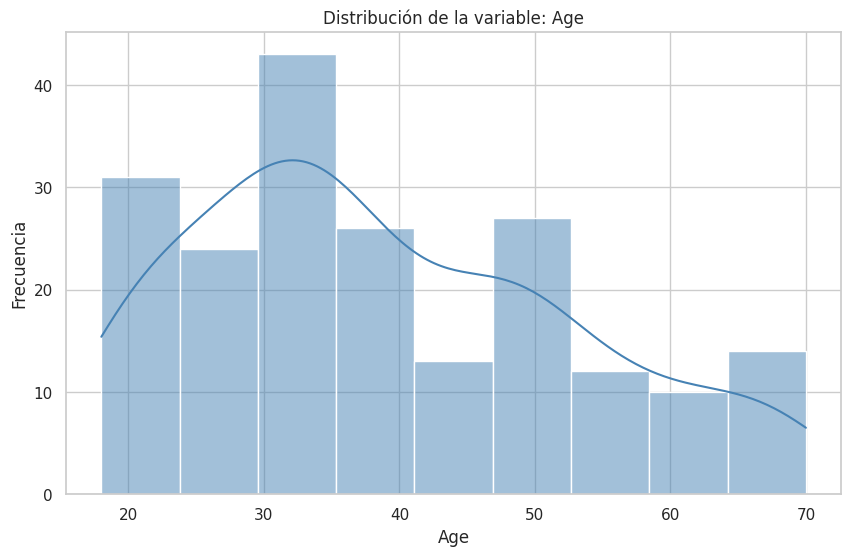

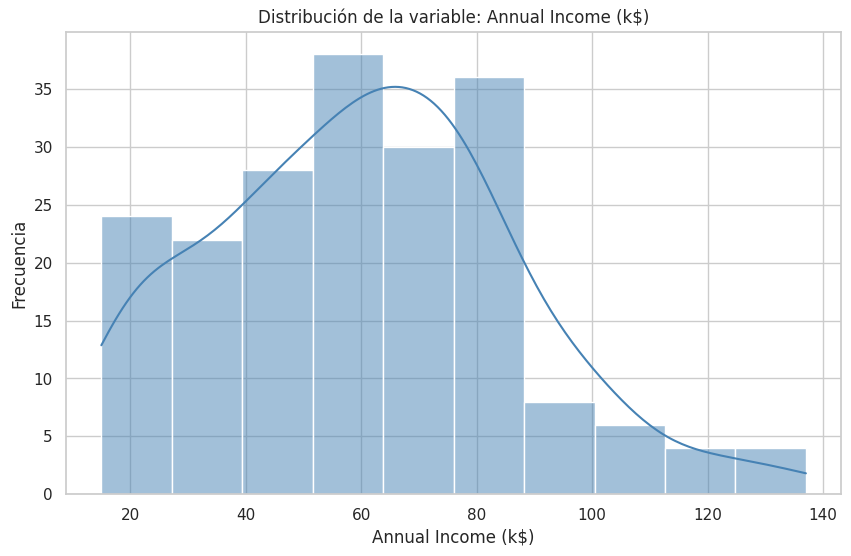

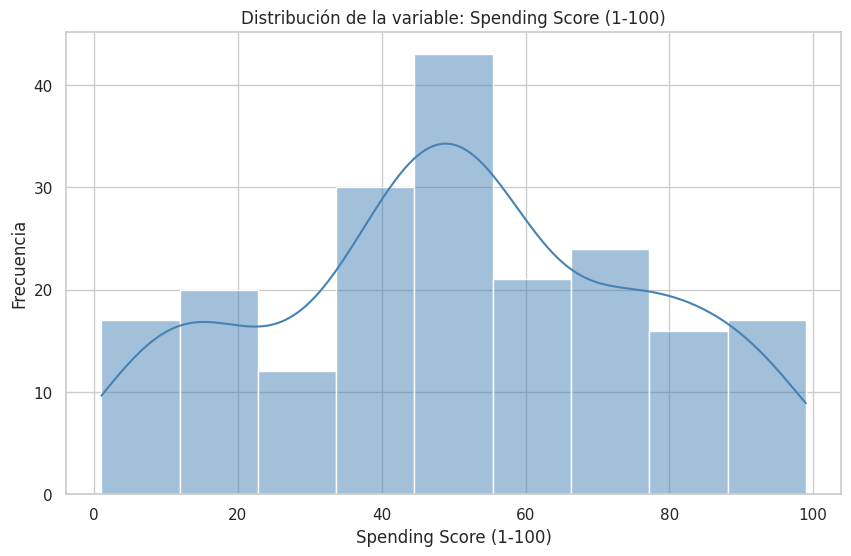

In [7]:
# Definimos las columnas numéricas que queremos analizar
variables_numericas = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Iteramos sobre cada variable para graficar su distribución
for columna in variables_numericas:
    sns.histplot(df[columna], kde=True, color='steelblue')
    plt.title(f'Distribución de la variable: {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

### Matriz de correlación

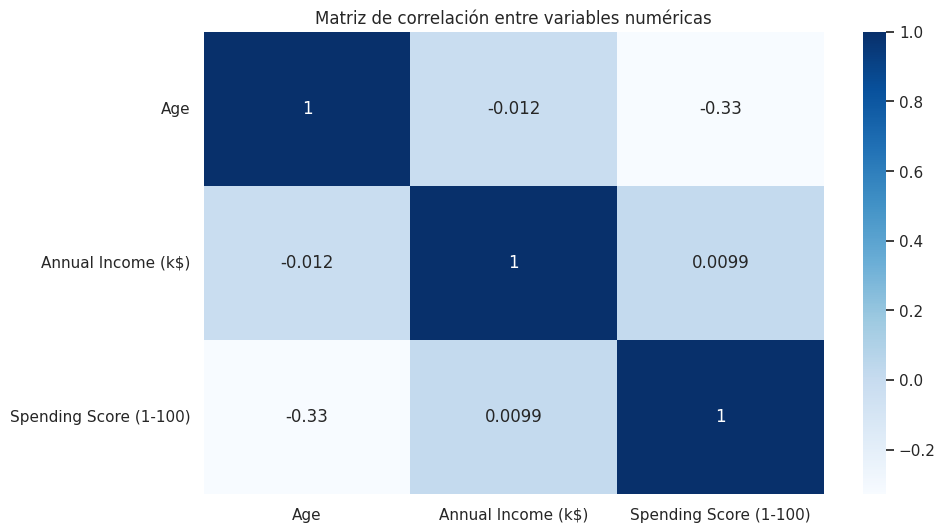

In [10]:
# Calculamos la matriz de correlación para variables numéricas
matriz_correlacion = df[variables_numericas].corr()

# Visualizamos la matriz con un mapa de calor (heatmap)
sns.heatmap(matriz_correlacion, annot=True, cmap='Blues')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

### Relación entre variables

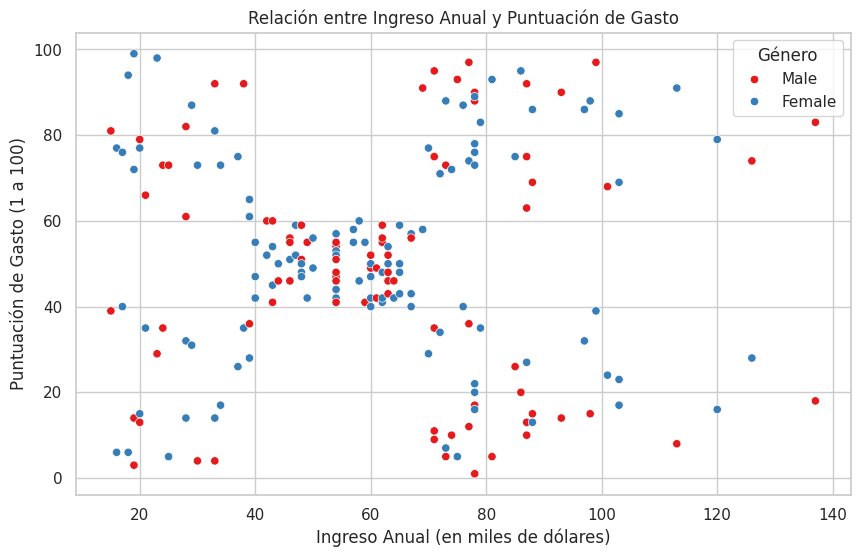

In [9]:
# Visualizamos la relación entre ingreso anual y puntuación de gasto
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender',
    palette='Set1',
    data=df
)
plt.title('Relación entre Ingreso Anual y Puntuación de Gasto')
plt.xlabel('Ingreso Anual (en miles de dólares)')
plt.ylabel('Puntuación de Gasto (1 a 100)')
plt.legend(title='Género')
plt.show()

## Conclusiones de la exploración de datos

      -> El dataset contiene 200 registros con 5 columnas: una categórica (Gender), tres numéricas (Age, Income, Score) y una identificadora (CustomerID).

      -> No se encontraron valores nulos ni inconsistencias estructurales.

      -> Las variables numéricas muestran distintas distribuciones. La edad es relativamente simétrica, mientras que los ingresos y el puntaje de gasto tienen distribuciones más segmentadas.

      -> La matriz de correlación muestra baja correlación lineal entre las variables. Esto sugiere que K-Means puede detectar agrupamientos no evidentes visualmente.

      -> Se identifican posibles clústeres al visualizar la relación entre ingreso y puntaje de gasto.

      -> La variable ‘Gender’ puede ser útil para análisis descriptivos pero no será incluida directamente en el modelo K-Means, que requiere variables numéricas.


Con esta base, nos estamos preparado para aplicar el algoritmo K-Means en la siguiente fase del proyecto.
